# Importing Required Libraries

In [20]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pan_tompkins import pt
from discrete_wavelet_transform import dwt
from utils import segment_ecg, compare_r_peaks, ecg_info

# Selection of ECG Signals and Annotations File

In [21]:
mat_folder = "database/RAW_ADC"
txt_folder = "database/Text_files"

# Excluded Signals: 214,228,231

# List of record IDs to process (Total 45 Signal)
record_ids = ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '215', '217', '219', '220', '221', '222', '223', '230', '232', '233', '234']

# Data Pre-processing and Feature Extraction
a. Load ECG signal and annotation data

b. Apply Pan-Tompkins algorithm to detect R-peaks and extract QRS complexes

c. Derive RR intervals and heart rate information

d. Match detected R-peaks with annotations and compare results

e. Segment ECG signals around annotated R-peaks

f. Combine results into a unified DataFrame for each record

In [22]:
# Store all full_df results
all_full_dfs = []

# ========== Processing Loop ==========

for record_id in record_ids:
    
    print(f"\n--- Processing {record_id} ---")
    mat_path = os.path.join(mat_folder, f"{record_id}m.mat")
    txt_path = os.path.join(txt_folder, f"{record_id}.txt")
    
    # Load ECG data
    data = loadmat(mat_path)
    EKG1 = data['val'][0].flatten()
    fs = 360
    # Load annotation
    df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,
                     names=["Time", "Sample#", "Type", "Sub", "Chan", "Num", "Aux"])
    atr_df = df[["Sample#", "Type"]]

    # Apply Pan-Tompkins algorithm
    filtered_ecg, r_wave_locs, qrs_amp_raw = pt(EKG1, fs, gr=0)
    forward_rri, backward_rri, instant_hr = ecg_info(r_wave_locs, fs)

    # Create detected R-peak DataFrame
    manual_PT = pd.DataFrame({
        "r_wave_locs": r_wave_locs,
        "frri": forward_rri,
        "brri": backward_rri,
        "instant_hr": instant_hr
    })

    # Compare with annotated R-peaks
    res_df, _, _, _ = compare_r_peaks(atr_df, manual_PT, tolerance=20)
    

    # Segment ECG
    segmented = segment_ecg(filtered_ecg, atr_df["Sample#"].to_numpy(), window=180)

    # Combine result
    full_df = pd.concat([res_df, segmented], axis=1)

    full_df["RecordID"] = record_id  # Add ID column for traceability

    # Store for final merge
    all_full_dfs.append(full_df)


--- Processing 100 ---


C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,
c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 101 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 102 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 103 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 104 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 105 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 106 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 107 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 108 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 109 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0



--- Processing 111 ---


C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,
c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0



--- Processing 112 ---


C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,
c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 113 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 114 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 115 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 116 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 117 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 118 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 119 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 121 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 122 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 123 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 124 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 200 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 201 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 202 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 203 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 205 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 207 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 208 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 209 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 210 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 212 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 213 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 215 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 217 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 219 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 220 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 221 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 222 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 223 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 230 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 232 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 233 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0
C:\Users\redow\AppData\Local\Temp\ipykernel_38136\6077919.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_path, delim_whitespace=True, skiprows=1,



--- Processing 234 ---


c:\Users\redow\OneDrive\Desktop\DSP Project\FInal_25_07\utils.py:14: RuntimeWarning: divide by zero encountered in divide
  instant_hr = np.where(forward_rri == 0, 0, 60 * fs / forward_rri) # instant_hr = 0 if forward_rri = 0


# Merging Processed Data

In [23]:
merged_df = pd.concat(all_full_dfs, ignore_index=True)
print("\n✅ All records merged successfully.")
print(merged_df.head())


✅ All records merged successfully.
   Sample#  Nearest_R_PT  Missed_PT  Diff   frri  brri  instant_hr Type  \
0       18            77          1    59    NaN    77   73.720137    +   
1       77            77          0     0  293.0    77   73.720137    N   
2      370           370          0     0  293.0   293   73.720137    N   
3      662           663          0     1  284.0   293   76.056338    N   
4      946           947          0     1  284.0   284   76.056338    N   

          0         1  ...       351       352       353       354       355  \
0       NaN       NaN  ... -0.008850 -0.006036 -0.003079 -0.000026  0.003070   
1       NaN       NaN  ...  0.006365  0.007581  0.008843  0.010111  0.011339   
2 -0.006036 -0.003079  ...  0.003446  0.005240  0.006973  0.008597  0.010069   
3  0.004391  0.010344  ...  0.008766  0.009006  0.009253  0.009513  0.009782   
4 -0.012932 -0.007866  ...  0.012513  0.012797  0.012896  0.012786  0.012447   

        356       357       358 

# Detection Metrics Calculation

In [24]:
print(f"Total R-waves: {merged_df.shape[0]}")
print(f"Total Detected R-waves: {merged_df.loc[merged_df["Missed_PT"]==0].shape[0]}")
print(f"Total Missed R-waves: {merged_df["Missed_PT"].sum()}")
print(f"Total Error of Detected R-waves: {merged_df.loc[merged_df["Missed_PT"]==0]["Diff"].sum()}")
print(f"Average Deviation on Detected R-waves: {merged_df.loc[merged_df["Missed_PT"]==0]["Diff"].sum()/merged_df.loc[merged_df["Missed_PT"]==0].shape[0]}")

Total R-waves: 104689
Total Detected R-waves: 90038
Total Missed R-waves: 14651
Total Error of Detected R-waves: 198163
Average Deviation on Detected R-waves: 2.200881849885604


# Feature Selection for Model Training

In [25]:
training_dataset = merged_df.drop(columns=["RecordID","Sample#", "Nearest_R_PT", "Diff"])
training_dataset = training_dataset.loc[training_dataset["Missed_PT"]==0]
training_dataset = training_dataset.drop(columns=["Missed_PT"])
training_dataset.columns = training_dataset.columns.astype(str)

In [26]:
training_dataset.columns

Index(['frri', 'brri', 'instant_hr', 'Type', '0', '1', '2', '3', '4', '5',
       ...
       '350', '351', '352', '353', '354', '355', '356', '357', '358', '359'],
      dtype='object', length=364)

# Exclusion of Problematic Beats

In [27]:
training_dataset = training_dataset.loc[
    ~(
        (training_dataset['frri'] == 0) |
        (training_dataset['brri'] == 0) |
        (training_dataset['frri'].isna())|
        (training_dataset['brri'].isna())|
        (training_dataset['instant_hr'] == 0)|
        (training_dataset['0'].isna())|
        (training_dataset['359'].isna())
    )
]



# Arrhythmia Class Distribution Analysis

In [28]:
print(training_dataset.shape)
training_dataset["Type"].value_counts()

(88460, 364)


Type
N    62049
/     6208
L     5851
R     5764
V     4533
A     2334
f      678
F      655
j      140
J       79
a       55
E       42
!       23
Q       18
|       16
e       14
~        1
Name: count, dtype: int64

# Type Selection For Model Training
--> Among all these labels we select the labels needed for our project and save it as the main_types and other as the "Other"

--> We peaked top 6 Types training.

A - Atrial Premature Contraction (APC)

L - Left Bundle branch Block Beat (LBB)

/ - Paced Beat

V - Premature Ventricular Contraction (PVC)

R - Right Bundle Branch Block Beat (RBB)

N - Normal Beat

In [29]:
main_types = ['A', 'L', '/', 'V', 'R', 'N']

# Replace all types not in your main_types with "Other"
training_dataset["Type"] = training_dataset["Type"].apply(
    lambda x: x if x in main_types else "Other"
)

# Now, count each type (including "Other" as a single type)
training_dataset["Type"].value_counts()


Type
N        62049
/         6208
L         5851
R         5764
V         4533
A         2334
Other     1721
Name: count, dtype: int64

C:\Users\redow\AppData\Local\Temp\ipykernel_38136\4172905.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(len(x), target_size), random_state=42))


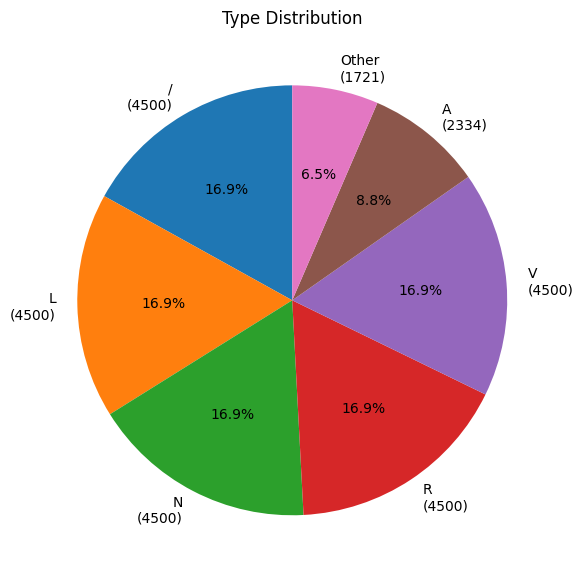

In [30]:
target_size = 4500

training_dataset = (
    training_dataset.groupby("Type")
    .apply(lambda x: x.sample(n=min(len(x), target_size), random_state=42))
    .reset_index(drop=True)
)


counts = training_dataset["Type"].value_counts()
labels = [f'{idx}\n({val})' for idx, val in zip(counts.index, counts.values)]  # Add counts in labels

plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=labels,
    autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
    startangle=90
)
plt.title("Type Distribution")
plt.tight_layout()
plt.show()

Final Training Dataset

In [31]:
training_dataset

,frri,brri,instant_hr,Type,0,1,2,3,4,5,...,350,351,352,353,354,355,356,357,358,359
0,293.0,298,73.720137,/,0.071612,0.076800,0.081392,0.085382,0.088756,0.091492,...,0.039311,0.042576,0.045287,0.047449,0.049064,0.050127,0.050629,0.050552,0.049873,0.048563
1,342.0,285,63.157895,/,0.081991,0.083640,0.084160,0.083547,0.081823,0.079026,...,-0.006944,-0.003311,0.000363,0.004020,0.007600,0.011045,0.014302,0.017321,0.020065,0.022506
2,307.0,329,70.358306,/,-0.073063,-0.079543,-0.085089,-0.089651,-0.093189,-0.095675,...,-0.004243,0.005537,0.014894,0.023709,0.031877,0.039309,0.045933,0.051694,0.056558,0.060503
3,283.0,290,76.325088,/,-0.002269,-0.000053,0.002127,0.004284,0.006423,0.008542,...,-0.016047,-0.014231,-0.012372,-0.010514,-0.008698,-0.006966,-0.005357,-0.003909,-0.002655,-0.001625
4,307.0,592,70.358306,/,-0.055979,-0.058891,-0.060501,-0.060877,-0.060123,-0.058373,...,0.074076,0.077784,0.080315,0.081713,0.082050,0.081413,0.079901,0.077622,0.074685,0.071197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26550,270.0,172,80.000000,V,-0.334567,-0.306833,-0.271425,-0.227635,-0.174952,-0.113147,...,0.009021,0.008039,0.007015,0.005938,0.004795,0.003569,0.002238,0.000784,-0.000812,-0.002562
26551,360.0,178,60.000000,V,0.642514,0.632489,0.601204,0.550137,0.481756,0.399361,...,0.010935,0.010862,0.010715,0.010513,0.010270,0.009994,0.009688,0.009353,0.008983,0.008572
26552,527.0,207,40.986717,V,-0.310840,-0.325389,-0.327421,-0.318382,-0.300065,-0.274482,...,-0.017210,-0.041180,-0.066676,-0.093358,-0.120811,-0.148536,-0.175968,-0.202484,-0.227417,-0.250081
26553,320.0,178,67.500000,V,0.592498,0.580536,0.549491,0.500601,0.435977,0.358482,...,0.001409,0.003232,0.005049,0.006864,0.008674,0.010464,0.012214,0.013896,0.015478,0.016930


# Splitting Training Dataset 


In [32]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = training_dataset.drop(columns=["Type"])
y = training_dataset["Type"]

# Split into train (80%) and temp (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Distribution of Training and Validation Dataset

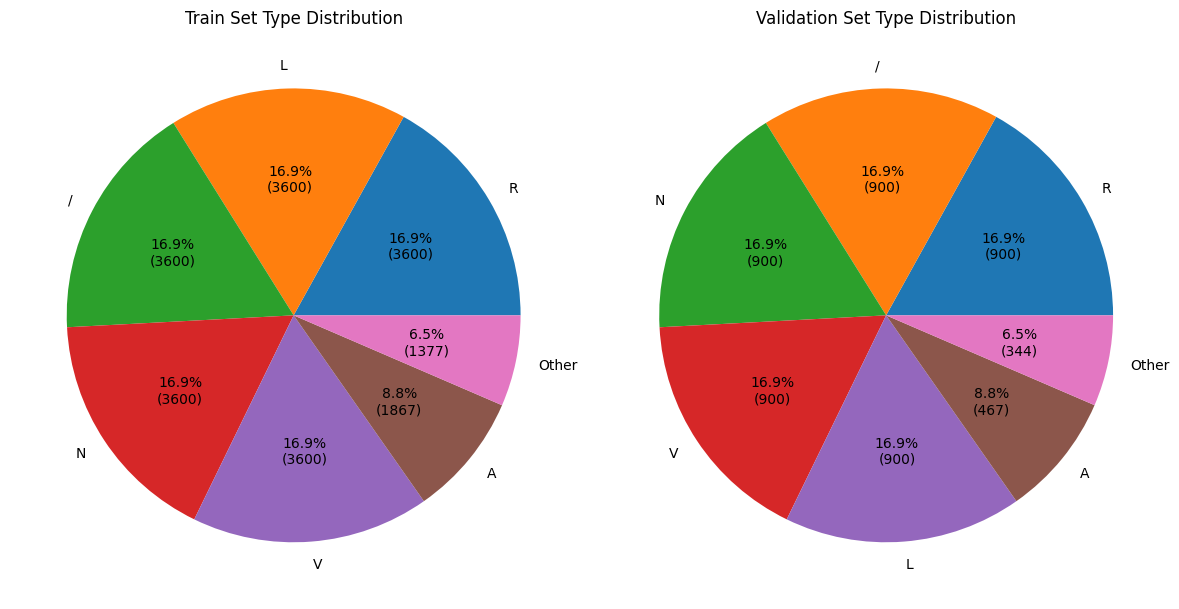

In [33]:
import matplotlib.pyplot as plt

# Get counts
train_counts = y_train.value_counts()
val_counts = y_val.value_counts()

# Autopct function to show % and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return my_autopct

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training pie chart
train_counts.plot(
    kind='pie',
    autopct=make_autopct(train_counts),
    ax=axes[0],
    title='Train Set Type Distribution'
)
axes[0].set_ylabel('')  # Optional: remove y-axis label

# Validation pie chart
val_counts.plot(
    kind='pie',
    autopct=make_autopct(val_counts),
    ax=axes[1],
    title='Validation Set Type Distribution'
)
axes[1].set_ylabel('')

# Layout adjustment
plt.tight_layout()
plt.show()


# Configuring SVM Multi-class Classifier Model

In [34]:
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create SVM pipeline with scaling
svm_clf = make_pipeline(
    StandardScaler(),       # Standardize features
    SVC(kernel='rbf', C=10, gamma='scale', random_state=42, class_weight='balanced')
)

# Fitting Training Dataset and Prediciting Validation Dataset

In [35]:
# Fit on training data
svm_clf.fit(X_train, y_train)

# Predict on training and validation data
y_train_pred = svm_clf.predict(X_train)
y_val_pred = svm_clf.predict(X_val)

Saving the Model in Pickle Format for Future Use

In [36]:
import pickle

with open('model_pt.pkl', 'wb') as f:
    pickle.dump(svm_clf, f)


# Accuracy Metrics

In [37]:
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score
from sklearn.metrics import classification_report

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}\n")

# print("=== Weighted Average Metrics ===")
# print(f"Precision: {precision_score(y_val, y_val_pred, average='weighted'):.4f}")
# print(f"Recall: {recall_score(y_val, y_val_pred, average='weighted'):.4f}")
# print(f"F1 Score: {f1_score(y_val, y_val_pred, average='weighted'):.4f}\n")

# print("=== Macro Average Metrics ===")
# print(f"Precision: {precision_score(y_val, y_val_pred, average='macro'):.4f}")
# print(f"Recall: {recall_score(y_val, y_val_pred, average='macro'):.4f}")
# print(f"F1 Score: {f1_score(y_val, y_val_pred, average='macro'):.4f}")

print("\n                   === Per-Class Metrics ===")
print(classification_report(y_val, y_val_pred, digits=4))


Train Accuracy: 0.9895
Validation Accuracy: 0.9655


                   === Per-Class Metrics ===
              precision    recall  f1-score   support

           /     0.9956    0.9956    0.9956       900
           A     0.9541    0.9358    0.9449       467
           L     0.9945    0.9956    0.9950       900
           N     0.9439    0.9356    0.9397       900
       Other     0.8372    0.8372    0.8372       344
           R     0.9956    0.9944    0.9950       900
           V     0.9531    0.9711    0.9620       900

    accuracy                         0.9655      5311
   macro avg     0.9534    0.9522    0.9528      5311
weighted avg     0.9655    0.9655    0.9655      5311



# Confusion Matrix

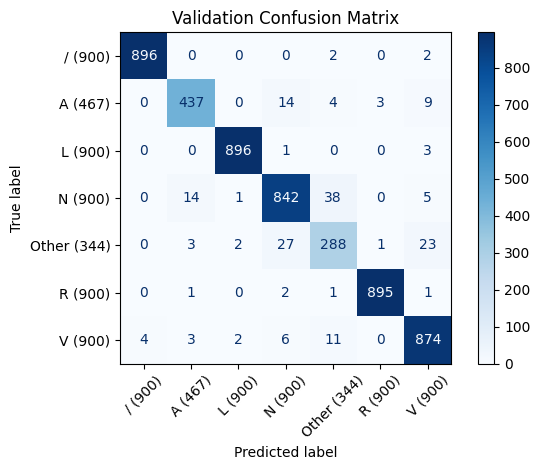

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_val_pred, labels=labels)

# Compute counts for each true label (sum of each row)
counts = cm.sum(axis=1)
# Update display labels to show count (e.g., 'N (1000)')
display_labels = [f"{lbl} ({cnt})" for lbl, cnt in zip(labels, counts)]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Validation Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()
